# Clustering con Python

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn import datasets

## Importar el dataset

In [8]:
df = pd.read_csv("../datasets/wine/winequality-red.csv", sep = ";")
df.shape

(1599, 12)

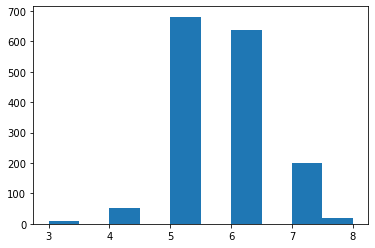

In [11]:
plt.hist(df["quality"])
plt.show()

In [17]:
df.groupby("quality").mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


## Normalización de los datos

In [23]:
df_norm = (df - df.min())/(df.max()-df.min())
df_norm

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,0.141593,0.328767,0.08,0.075342,0.130217,0.436620,0.134276,0.354626,0.559055,0.149701,0.323077,0.4
1595,0.115044,0.294521,0.10,0.089041,0.083472,0.535211,0.159011,0.370778,0.614173,0.257485,0.430769,0.6
1596,0.150442,0.267123,0.13,0.095890,0.106845,0.394366,0.120141,0.416300,0.535433,0.251497,0.400000,0.6
1597,0.115044,0.359589,0.12,0.075342,0.105175,0.436620,0.134276,0.396476,0.653543,0.227545,0.276923,0.4


## Clustering con scikit-learn

In [27]:
clus = AgglomerativeClustering(n_clusters = 6, linkage = "ward").fit(df_norm)

In [29]:
md = pd.Series(clus.labels_)

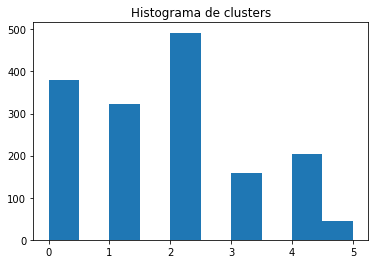

In [33]:
plt.hist(md)
plt.title("Histograma de clusters")
plt.show()

In [34]:
clus.children_

array([[   0,    4],
       [ 135,  140],
       [ 750,  751],
       ...,
       [3179, 3191],
       [3192, 3193],
       [3194, 3195]])

In [41]:
Z = linkage(df_norm, "ward")

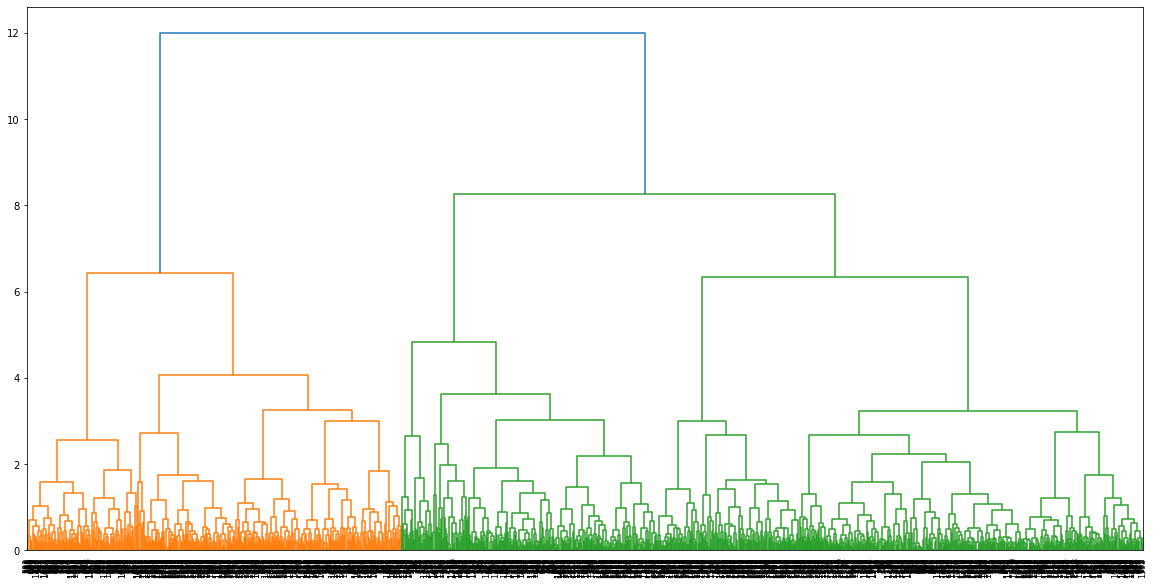

In [42]:
plt.figure(figsize = (20,10))
dendrogram(Z, leaf_rotation = 90, leaf_font_size = 8)
plt.show()

## K-means

In [44]:
model = KMeans(n_clusters = 6)
model.fit(df_norm)

KMeans(n_clusters=6)

In [45]:
model.labels_

array([4, 4, 4, ..., 1, 4, 5], dtype=int32)

In [46]:
md_k = pd.Series(model.labels_)

In [47]:
df_norm["clust_h"] = md
df_norm["clust_k"] = md_k

In [49]:
model.cluster_centers_

array([[0.58882695, 0.20854203, 0.54519824, 0.13098184, 0.17456407,
        0.14537445, 0.09777245, 0.65508419, 0.31648687, 0.25323802,
        0.29350503, 0.54537445],
       [0.17510056, 0.31824408, 0.09431818, 0.09280822, 0.09569737,
        0.24731114, 0.12340186, 0.31946669, 0.57652112, 0.18405008,
        0.49484848, 0.61454545],
       [0.31977042, 0.27805489, 0.31126812, 0.16167858, 0.12891655,
        0.40020923, 0.31310493, 0.54137671, 0.42804975, 0.18914345,
        0.21765143, 0.45217391],
       [0.327672  , 0.27518334, 0.2623569 , 0.09148563, 0.13088593,
        0.13662446, 0.12109315, 0.52046654, 0.42214799, 0.18720135,
        0.21478891, 0.5016835 ],
       [0.23768479, 0.3897478 , 0.06910405, 0.09437604, 0.12089996,
        0.16724334, 0.10795768, 0.48126692, 0.52248418, 0.15182929,
        0.23327405, 0.4150289 ],
       [0.37057997, 0.15437415, 0.43364807, 0.1067964 , 0.10510364,
        0.16605211, 0.08400188, 0.40491136, 0.4123889 , 0.23985505,
        0.504655  ,

In [50]:
model.inertia_

188.55739232622918

## Interpretación final

In [54]:
df_norm.groupby("clust_k").mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,clust_h
clust_k,,,,,,,,,,,,,
0,0.588827,0.208542,0.545198,0.130982,0.174564,0.145374,0.097772,0.655084,0.316487,0.253238,0.293505,0.545374,2.480176
1,0.175101,0.318244,0.094318,0.092808,0.095697,0.247311,0.123402,0.319467,0.576521,0.184050,0.494848,0.614545,3.422727
2,0.319770,0.278055,0.311268,0.161679,0.128917,0.400209,0.313105,0.541377,0.428050,0.189143,0.217651,0.452174,1.039855
3,0.327672,0.275183,0.262357,0.091486,0.130886,0.136624,0.121093,0.520467,0.422148,0.187201,0.214789,0.501684,1.535354
4,0.237685,0.389748,0.069104,0.094376,0.120900,0.167243,0.107958,0.481267,0.522484,0.151829,0.233274,0.415029,2.132948
5,0.370580,0.154374,0.433648,0.106796,0.105104,0.166052,0.084002,0.404911,0.412389,0.239855,0.504655,0.715021,0.081545
